In [2]:
import pandas as pd

path = "/Users/hwangjeonghyun/Downloads/Covid Data.csv"
df = pd.read_csv(path)

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)      
pd.set_option('display.max_colwidth', None)

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
df.shape

(1048575, 21)

In [8]:
# 숫자형 요약
print("\n기본 통계량:")
print(df.describe())

# 범주형 컬럼 몇 개 샘플
print("\nDATE_DIED 샘플:")
print(df['DATE_DIED'].value_counts().head())


기본 통계량:
              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  7.952288e+01   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  3.686889e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  9.700000e+01   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00  9.700000e+01   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00  9.700000e+01   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00  9.900000e+01   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.346831e+00  4.179410e+01  4.976558e+01  2.186404e+00  2.260569e+00   
std    1.191288e+01  1.690739e+01  4.75107

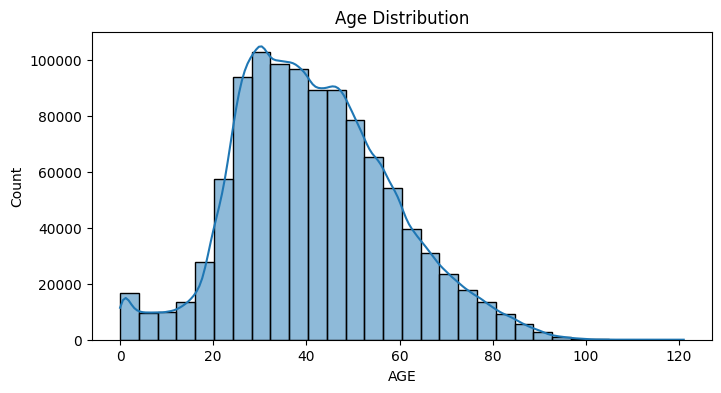

AGE_GROUP
20-39    449919
40-59    376676
60-79    125088
0-19      73746
80+       19283
Name: count, dtype: int64


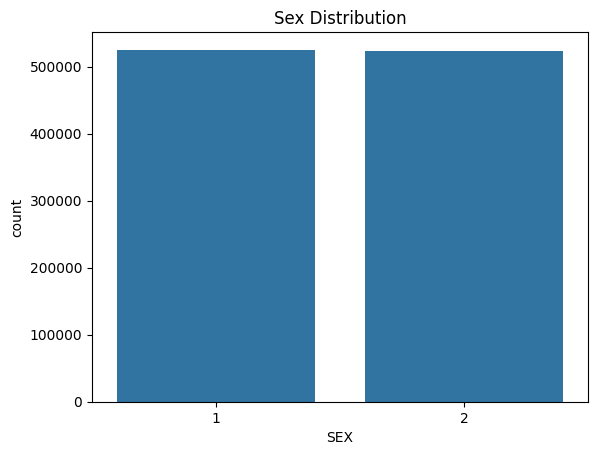

PREGNANT
2     513179
1       8131
98      3754
Name: count, dtype: int64


In [10]:
# AGE 분포
plt.figure(figsize=(8,4))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# AGE 그룹별 개수
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0,20,40,60,80,120], labels=['0-19','20-39','40-59','60-79','80+'])
print(df['AGE_GROUP'].value_counts())

# 성별 분포
sns.countplot(x='SEX', data=df)
plt.title("Sex Distribution")
plt.show()

# 임신 여부 (여성만 필터해서 카운트)
print(df[df['SEX']==1]['PREGNANT'].value_counts())


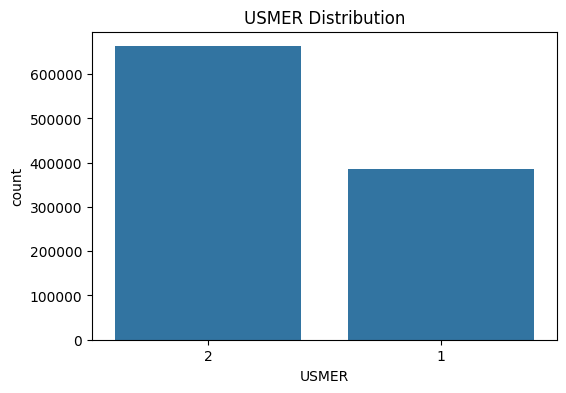

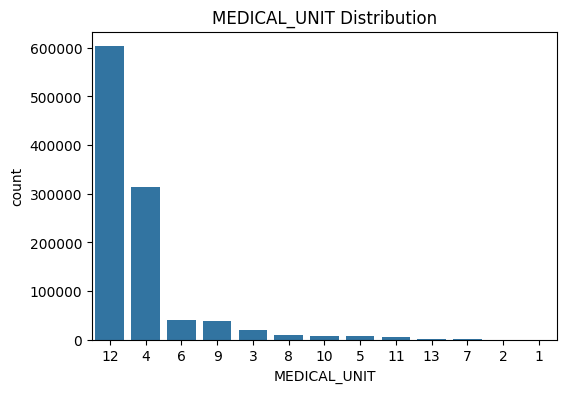

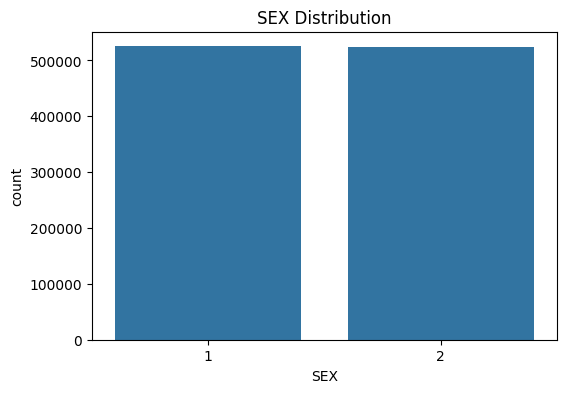

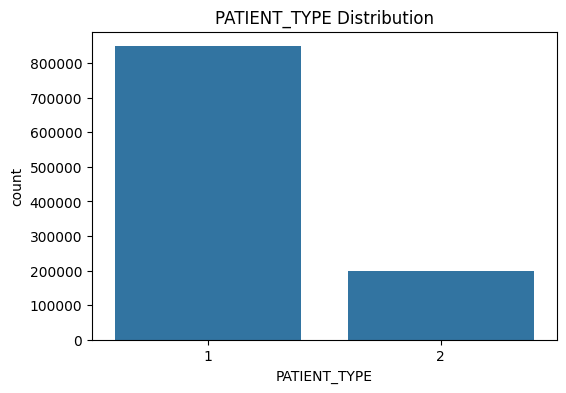

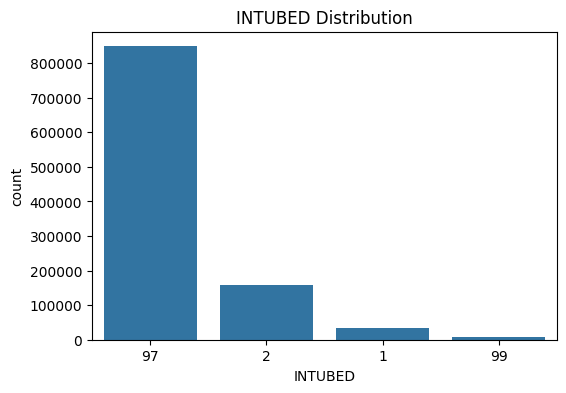

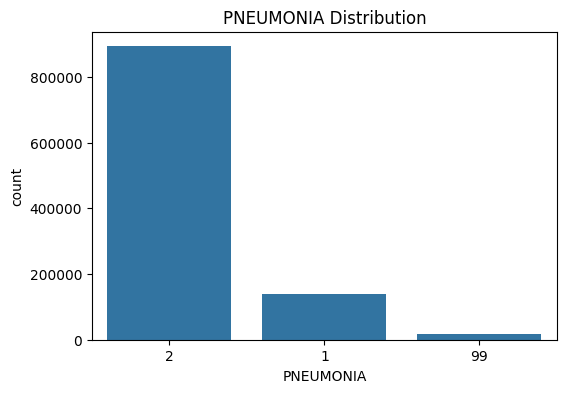

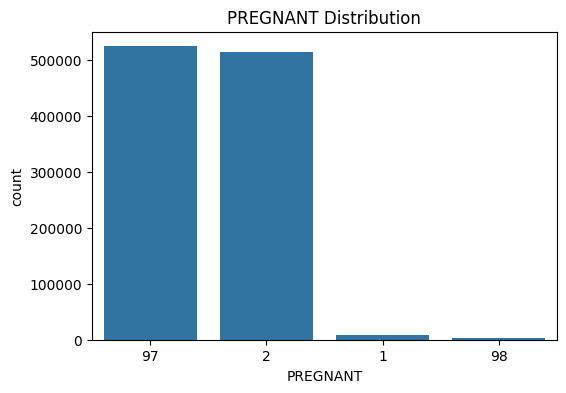

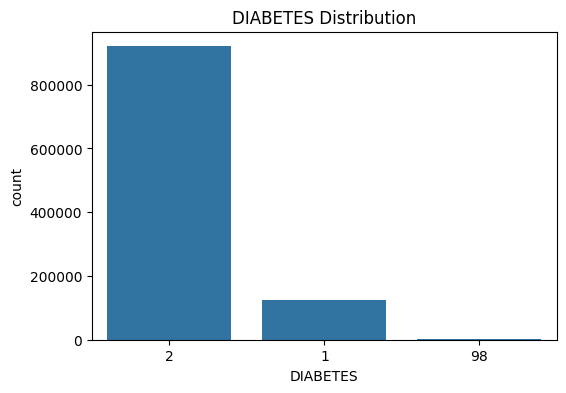

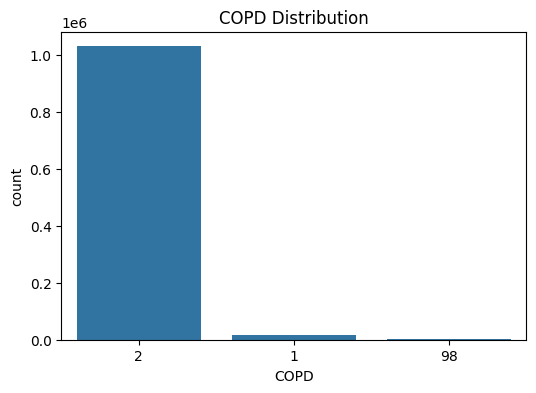

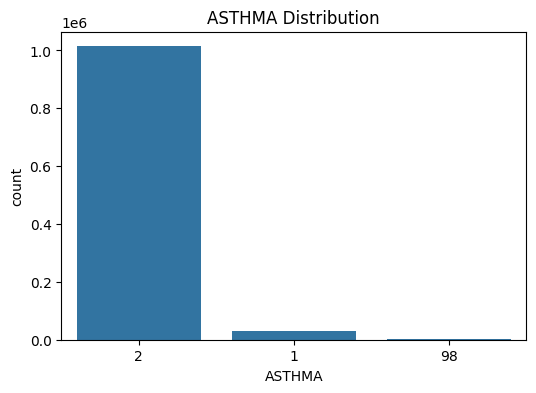

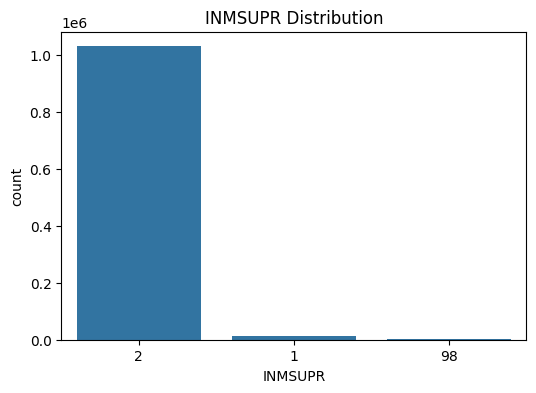

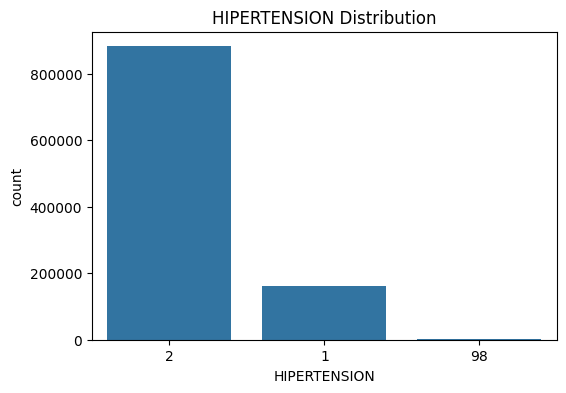

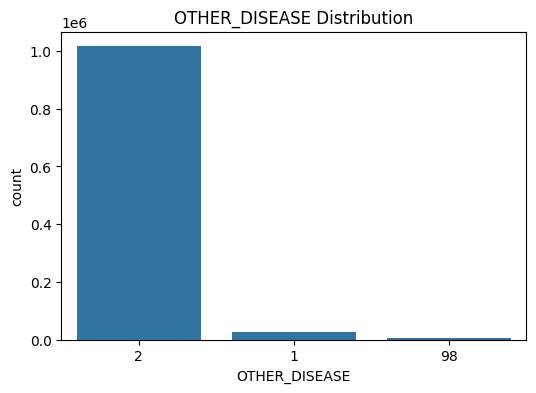

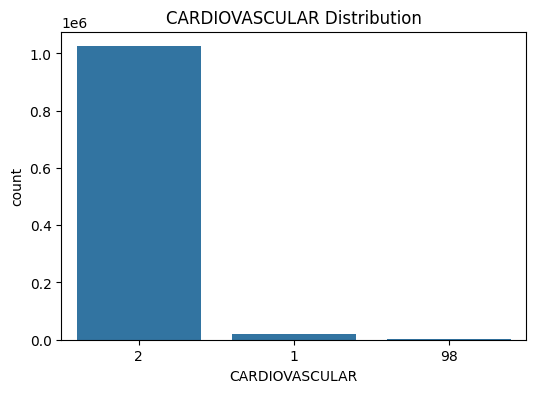

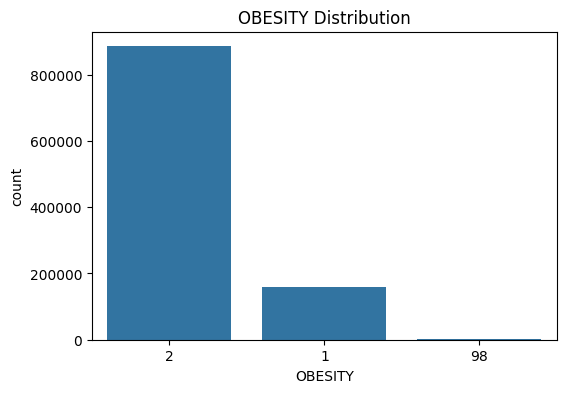

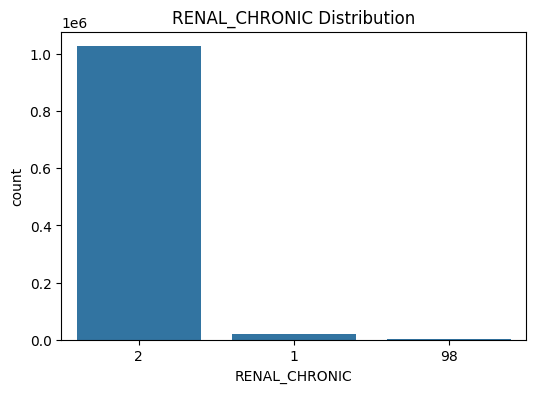

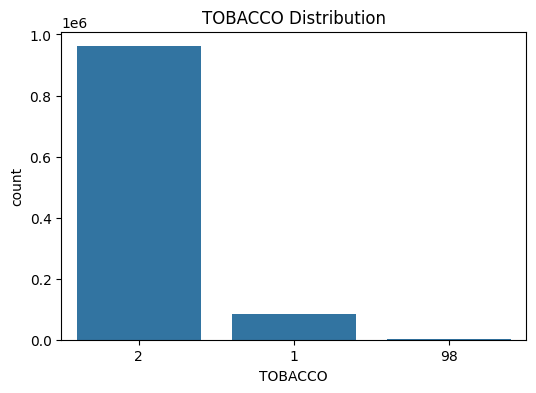

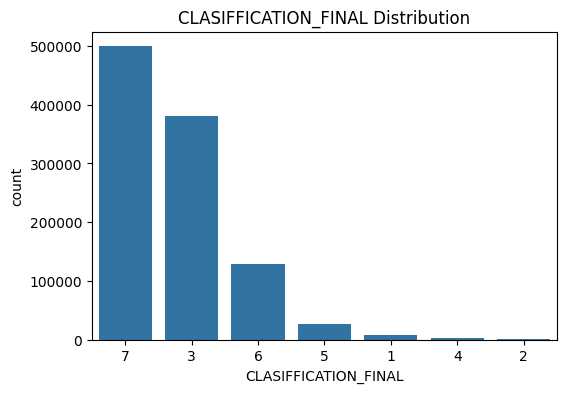

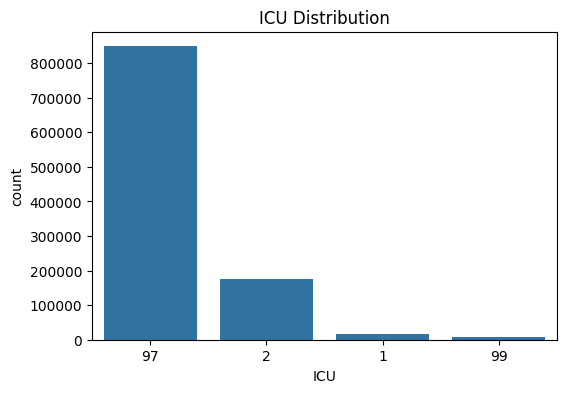

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수 후보 (int지만 사실상 카테고리형)
cat_cols = [
    'USMER','MEDICAL_UNIT','SEX','PATIENT_TYPE','INTUBED','PNEUMONIA',
    'PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION',
    'OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC',
    'TOBACCO','CLASIFFICATION_FINAL','ICU'
]

# 컬럼별 countplot
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.show()


In [13]:
print("USMER 값 분포:")
print(df['USMER'].value_counts().head())

print("\nMEDICAL_UNIT 값 분포:")
print(df['MEDICAL_UNIT'].value_counts().head())


USMER 값 분포:
USMER
2    662903
1    385672
Name: count, dtype: int64

MEDICAL_UNIT 값 분포:
MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
Name: count, dtype: int64


In [14]:
# 원래 DATE_DIED 값 샘플
print(df['DATE_DIED'].value_counts().head())

# 실제 날짜 vs '9999-99-99'
alive = (df['DATE_DIED'] == '9999-99-99').sum()
dead = (df['DATE_DIED'] != '9999-99-99').sum()
print(f"생존: {alive}, 사망: {dead}")


DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
Name: count, dtype: int64
생존: 971633, 사망: 76942


In [19]:
# 사망 날짜 히스토그램 (9999-99-99 제외)
date_died_clean = df.loc[df['DATE_DIED'] != '9999-99-99', 'DATE_DIED']
plt.figure(figsize=(200,100))
sns.histplot(date_died_clean)
plt.xticks(rotation=45)
plt.title("Death Dates Distribution")
plt.show()


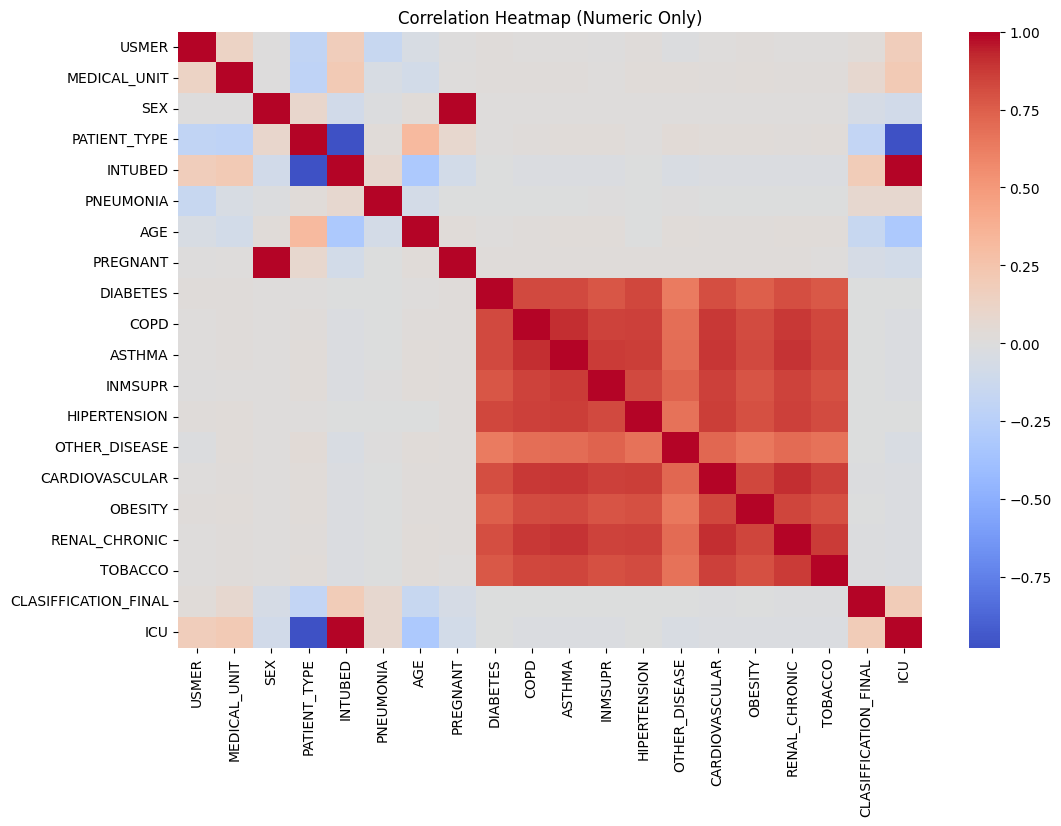

In [20]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numeric Only)")
plt.show()


In [27]:
pd.crosstab(df['SEX'], df['PREGNANT'])

PREGNANT,1,2,97,98
SEX,,,,
1,8131,513179,0,3754
2,0,0,523511,0


In [ ]:
pd.crosstab(df['PATIENT_TYPE'], df['INTUBED'])


INTUBED,1,2,97,99
PATIENT_TYPE,,,,
1,0,0,848544,0
2,33656,159050,0,7325


In [24]:
disease_cols = ['DIABETES','OBESITY','HIPERTENSION','RENAL_CHRONIC',
                'COPD','ASTHMA','CARDIOVASCULAR','INMSUPR','TOBACCO','OTHER_DISEASE']
df['NUM_DISEASES'] = df[disease_cols].sum(axis=1)
df['NUM_DISEASES'].value_counts().sort_index()


NUM_DISEASES
10        101
11         37
12         46
13        170
14        671
15       2884
16      10959
17      39896
18     108703
19     253027
20     624519
107         1
108         1
109         4
110        13
111        30
112        89
113       243
114       575
115      1132
116      1706
206         1
207        11
208        28
209        55
210       114
211       173
212       287
302         2
303         2
304         5
305         9
306        21
307        34
308        69
400         1
401         5
402        12
403        17
404        29
495         2
496         5
497         1
498        12
499        18
500        31
592         3
593         3
594         7
595        17
596        29
689        18
690        13
691        13
692        50
786        55
787        30
788        56
883       179
884       213
980      2138
Name: count, dtype: int64

In [25]:
df['DATE_DIED'].value_counts().head()
print("사망 기록:", (df['DATE_DIED']!='9999-99-99').sum())
print("생존 기록:", (df['DATE_DIED']=='9999-99-99').sum())


사망 기록: 76942
생존 기록: 971633


연령대별 확진자 수:
 AGE_GROUP
0-19      15346
20-39    149506
40-59    154942
60-79     62825
80+        8616
Name: count, dtype: int64

연령대별 사망자 수:
 AGE_GROUP
0-19       723
20-39     5781
40-59    28656
60-79    34527
80+       7046
Name: count, dtype: int64


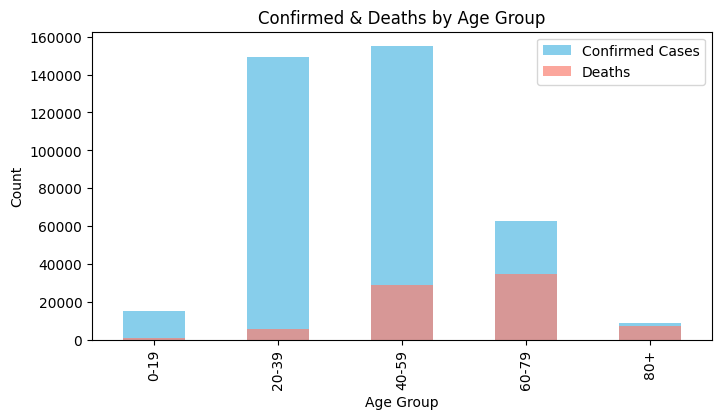

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 연령대 구간 정의
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0,20,40,60,80,120], 
                         labels=['0-19','20-39','40-59','60-79','80+'])

# 확진자 (CLASIFFICATION_FINAL 1~3)
confirmed = df[df['CLASIFFICATION_FINAL'].isin([1,2,3])]

# 사망자 (DATE_DIED != 9999-99-99)
dead = df[df['DATE_DIED'] != '9999-99-99']

# 연령대별 확진자 수
confirmed_count = confirmed['AGE_GROUP'].value_counts().sort_index()

# 연령대별 사망자 수
dead_count = dead['AGE_GROUP'].value_counts().sort_index()

print("연령대별 확진자 수:\n", confirmed_count)
print("\n연령대별 사망자 수:\n", dead_count)

# 시각화
plt.figure(figsize=(8,4))
confirmed_count.plot(kind='bar', color='skyblue', label='Confirmed Cases')
dead_count.plot(kind='bar', color='salmon', alpha=0.7, label='Deaths')
plt.title("Confirmed & Deaths by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend()
plt.show()


           Confirmed  Deaths  CFR_%
AGE_GROUP                          
0-19           15346     723   4.71
20-39         149506    5781   3.87
40-59         154942   28656  18.49
60-79          62825   34527  54.96
80+             8616    7046  81.78


/var/folders/zx/cn5rp85x1gg2mjyqzz1tnj480000gn/T/ipykernel_6646/2071725141.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  confirmed_count = confirmed.groupby('AGE_GROUP').size().reindex(idx).fillna(0).astype(int)
/var/folders/zx/cn5rp85x1gg2mjyqzz1tnj480000gn/T/ipykernel_6646/2071725141.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dead_count      = dead.groupby('AGE_GROUP').size().reindex(idx).fillna(0).astype(int)


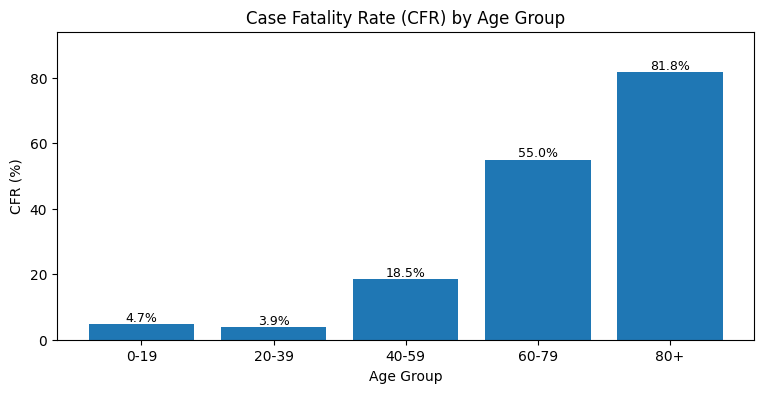

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) 연령대 만들기 (이미 있으면 건너뜀)
if 'AGE_GROUP' not in df.columns:
    df['AGE_GROUP'] = pd.cut(
        df['AGE'], bins=[0,20,40,60,80,120],
        labels=['0-19','20-39','40-59','60-79','80+'],
        right=False
    )

# 2) 확진/사망 분리
confirmed = df[df['CLASIFFICATION_FINAL'].isin([1,2,3])]
dead = df[df['DATE_DIED'] != '9999-99-99']

# 3) 연령대별 집계
idx = pd.Index(['0-19','20-39','40-59','60-79','80+'], name='AGE_GROUP')

confirmed_count = confirmed.groupby('AGE_GROUP').size().reindex(idx).fillna(0).astype(int)
dead_count      = dead.groupby('AGE_GROUP').size().reindex(idx).fillna(0).astype(int)

# 4) 치명률(CFR = 사망/확진, %) 계산
cfr = (dead_count / confirmed_count.replace(0, np.nan) * 100).round(2)

# 5) 표로 확인
result = pd.DataFrame({
    'Confirmed': confirmed_count,
    'Deaths': dead_count,
    'CFR_%': cfr
})
print(result)

# 6) 시각화
plt.figure(figsize=(9,4))
plt.bar(result.index.astype(str), result['CFR_%'])
plt.title('Case Fatality Rate (CFR) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('CFR (%)')
# 막대 위 값 표시
for i, v in enumerate(result['CFR_%']):
    if pd.notna(v):
        plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
plt.ylim(0, max(result['CFR_%'].fillna(0))*1.15)
plt.show()


        Confirmed  Deaths  CFR_%
SEX                             
Female     182490   27402  15.02
Male       209489   49540  23.65


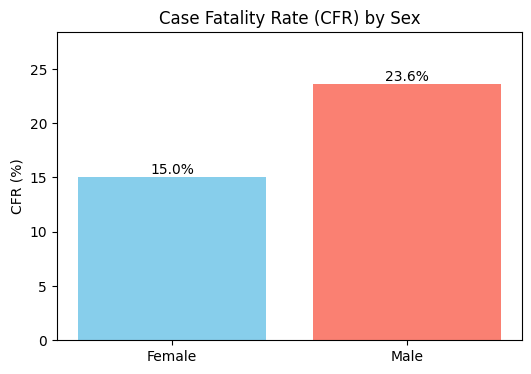

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 확진자 (CLASIFFICATION_FINAL 1~3)
confirmed = df[df['CLASIFFICATION_FINAL'].isin([1,2,3])]

# 사망자 (DATE_DIED != "9999-99-99")
dead = df[df['DATE_DIED'] != '9999-99-99']

# 성별별 집계
sex_labels = {1: 'Female', 2: 'Male'}

confirmed_count = confirmed['SEX'].value_counts().sort_index()
dead_count = dead['SEX'].value_counts().sort_index()

# 치명률 계산
cfr = (dead_count / confirmed_count * 100).round(2)

# 결과 표
result = pd.DataFrame({
    'Confirmed': confirmed_count,
    'Deaths': dead_count,
    'CFR_%': cfr
}).rename(index=sex_labels)

print(result)

# 시각화
plt.figure(figsize=(6,4))
plt.bar(result.index, result['CFR_%'], color=['skyblue','salmon'])
plt.title('Case Fatality Rate (CFR) by Sex')
plt.ylabel('CFR (%)')

# 막대 위 값 표시
for i, v in enumerate(result['CFR_%']):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

plt.ylim(0, max(result['CFR_%'])*1.2)
plt.show()


SEX        Female   Male
AGE_GROUP               
0-19         4.30   5.13
20-39        2.50   5.16
40-59       13.02  23.10
60-79       47.95  60.25
80+         76.58  86.09


/var/folders/zx/cn5rp85x1gg2mjyqzz1tnj480000gn/T/ipykernel_6646/931861227.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  confirmed_group = confirmed.groupby(['AGE_GROUP','SEX']).size().unstack()
/var/folders/zx/cn5rp85x1gg2mjyqzz1tnj480000gn/T/ipykernel_6646/931861227.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dead_group = dead.groupby(['AGE_GROUP','SEX']).size().unstack()


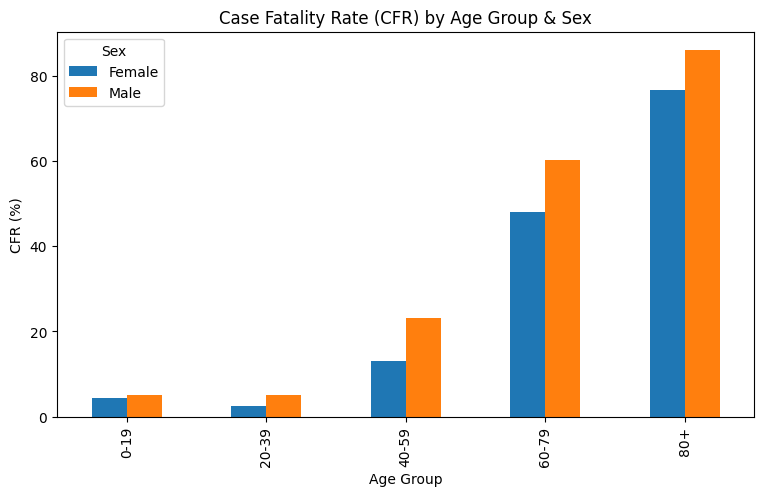

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 연령대 구간 만들기 (이미 있으면 건너뜀)
if 'AGE_GROUP' not in df.columns:
    df['AGE_GROUP'] = pd.cut(
        df['AGE'], bins=[0,20,40,60,80,120],
        labels=['0-19','20-39','40-59','60-79','80+'],
        right=False
    )

# 확진자 / 사망자 구분
confirmed = df[df['CLASIFFICATION_FINAL'].isin([1,2,3])]
dead = df[df['DATE_DIED'] != '9999-99-99']

# 교차 집계
confirmed_group = confirmed.groupby(['AGE_GROUP','SEX']).size().unstack()
dead_group = dead.groupby(['AGE_GROUP','SEX']).size().unstack()

# CFR 계산
cfr_group = (dead_group / confirmed_group * 100).round(2)

# 결과 표
sex_labels = {1:'Female', 2:'Male'}
cfr_group = cfr_group.rename(columns=sex_labels)
print(cfr_group)

# 시각화
cfr_group.plot(kind='bar', figsize=(9,5))
plt.title("Case Fatality Rate (CFR) by Age Group & Sex")
plt.ylabel("CFR (%)")
plt.xlabel("Age Group")
plt.legend(title="Sex")
plt.show()


SEX          Female   Male
HAS_DISEASE               
No             2.39   5.38
Yes           27.59  38.14


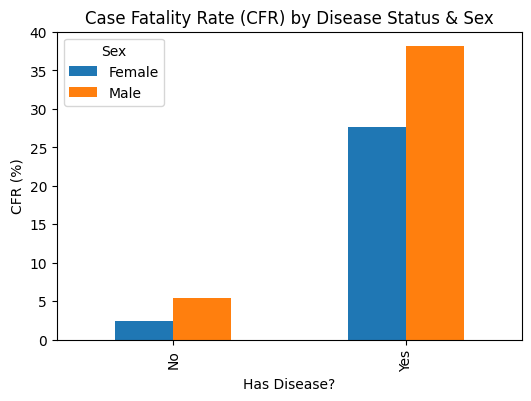

In [8]:
# 질환 컬럼들
disease_cols = ['PNEUMONIA','DIABETES','COPD','ASTHMA','INMSUPR',
                'HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR',
                'OBESITY','RENAL_CHRONIC','TOBACCO']

# 기저질환 개수
df['NUM_DISEASES'] = (df[disease_cols]==1).sum(axis=1)

# 기저질환 유무
df['HAS_DISEASE'] = np.where(df['NUM_DISEASES']>0, 'Yes','No')

# 확진자 / 사망자
confirmed = df[df['CLASIFFICATION_FINAL'].isin([1,2,3])]
dead = df[df['DATE_DIED'] != '9999-99-99']

# 교차 집계 (기저질환 유무 × 성별)
confirmed_group2 = confirmed.groupby(['HAS_DISEASE','SEX']).size().unstack()
dead_group2 = dead.groupby(['HAS_DISEASE','SEX']).size().unstack()

# CFR 계산
cfr_group2 = (dead_group2 / confirmed_group2 * 100).round(2)
cfr_group2 = cfr_group2.rename(columns=sex_labels)
print(cfr_group2)

# 시각화
cfr_group2.plot(kind='bar', figsize=(6,4))
plt.title("Case Fatality Rate (CFR) by Disease Status & Sex")
plt.ylabel("CFR (%)")
plt.xlabel("Has Disease?")
plt.legend(title="Sex")
plt.show()


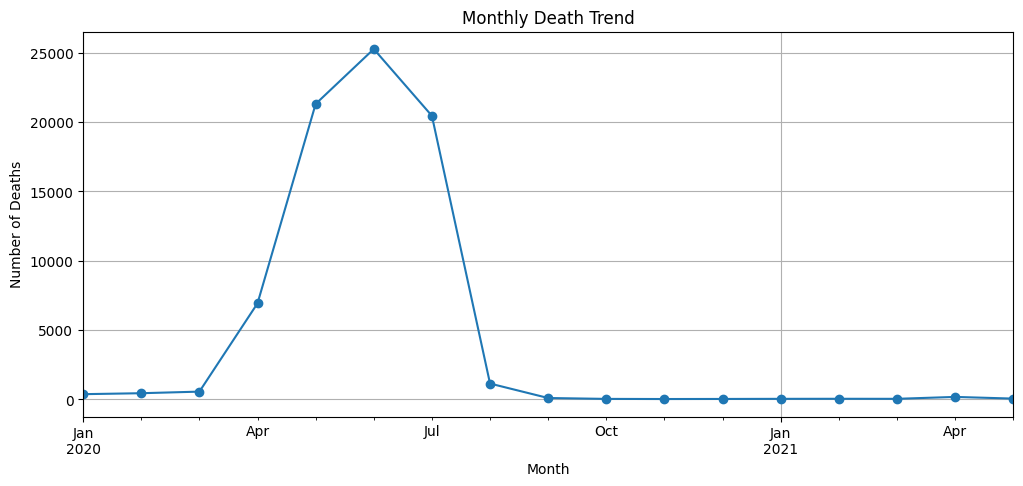

In [9]:
import matplotlib.pyplot as plt

# 사망자만 추출
dead = df[df['DATE_DIED'] != '9999-99-99'].copy()

# DATE_DIED를 datetime으로 변환
dead['DATE_DIED'] = pd.to_datetime(dead['DATE_DIED'], format='%d/%m/%Y', errors='coerce')

# 월 단위 집계
monthly_deaths = dead['DATE_DIED'].dt.to_period('M').value_counts().sort_index()

# 시각화
plt.figure(figsize=(12,5))
monthly_deaths.plot(kind='line', marker='o')
plt.title("Monthly Death Trend")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.grid(True)
plt.show()


              Confirmed  Deaths   CFR_%
NUM_DISEASES                           
0                183720    7163    3.90
1                106640   21361   20.03
2                 57869   21458   37.08
3                 28790   15913   55.27
4                 10897    7583   69.59
5                  3016    2493   82.66
6                   779     736   94.48
7                   165     190  115.15
8                    36      29   80.56
9                    19       9   47.37
10                   37       3    8.11
11                   11       4   36.36


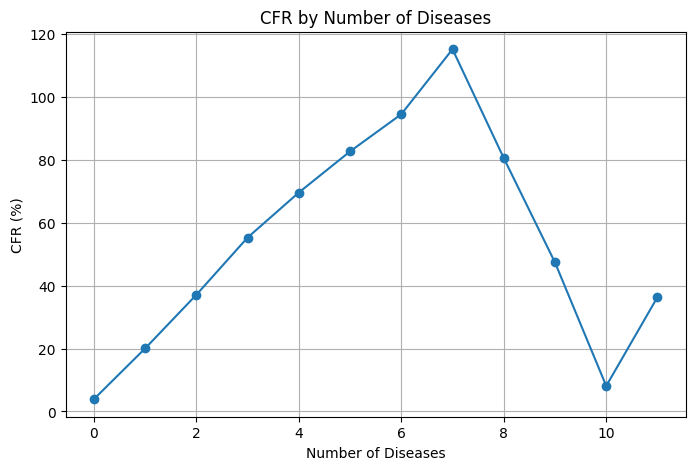

In [10]:
# 주요 질환 컬럼
disease_cols = ['PNEUMONIA','DIABETES','COPD','ASTHMA','INMSUPR',
                'HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR',
                'OBESITY','RENAL_CHRONIC','TOBACCO']

# 질환 개수 계산 (1=Yes)
df['NUM_DISEASES'] = (df[disease_cols]==1).sum(axis=1)

# 확진자 & 사망자
confirmed = df[df['CLASIFFICATION_FINAL'].isin([1,2,3])]
dead = df[df['DATE_DIED'] != '9999-99-99']

# 집계
confirmed_group = confirmed.groupby('NUM_DISEASES').size()
dead_group = dead.groupby('NUM_DISEASES').size()

# 치명률
cfr = (dead_group / confirmed_group * 100).round(2)

# 결과표
disease_result = pd.DataFrame({
    'Confirmed': confirmed_group,
    'Deaths': dead_group,
    'CFR_%': cfr
})
print(disease_result)

# 시각화
plt.figure(figsize=(8,5))
plt.plot(disease_result.index, disease_result['CFR_%'], marker='o')
plt.title("CFR by Number of Diseases")
plt.xlabel("Number of Diseases")
plt.ylabel("CFR (%)")
plt.grid(True)
plt.show()


HAS_DISEASE     No    Yes
AGE_GROUP                
0-19          1.75  25.40
20-39         0.75   9.01
40-59         4.20  26.45
60-79        22.26  59.95
80+          47.56  87.02


/var/folders/zx/cn5rp85x1gg2mjyqzz1tnj480000gn/T/ipykernel_6646/1479853625.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed['HAS_DISEASE'] = (confirmed['NUM_DISEASES']>0).map({True:'Yes', False:'No'})
/var/folders/zx/cn5rp85x1gg2mjyqzz1tnj480000gn/T/ipykernel_6646/1479853625.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['HAS_DISEASE'] = (dead['NUM_DISEASES']>0).map({True:'Yes', False:'No'})
/var/folders/zx/cn5rp85x1gg2mjyqzz1tnj480000gn/T/ipykernel_6646/1479853625.py:16: FutureWarn

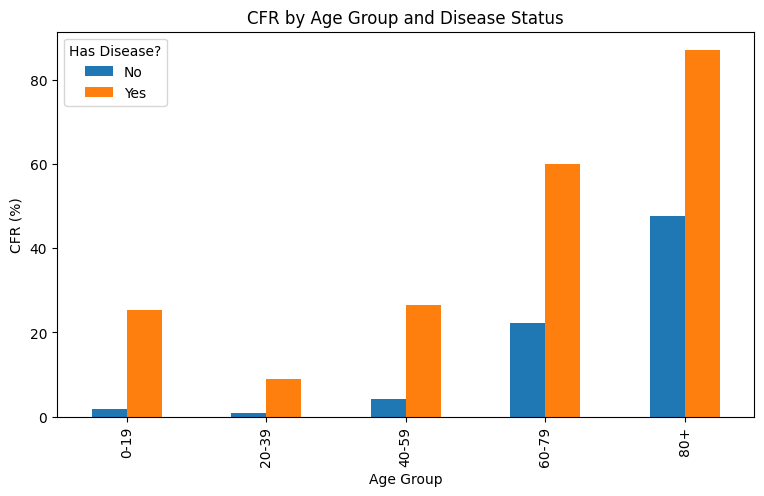

In [11]:
# 연령대 그룹화
df['AGE_GROUP'] = pd.cut(
    df['AGE'], bins=[0,20,40,60,80,120],
    labels=['0-19','20-39','40-59','60-79','80+'],
    right=False
)

# 확진자 & 사망자
confirmed = df[df['CLASIFFICATION_FINAL'].isin([1,2,3])]
dead = df[df['DATE_DIED'] != '9999-99-99']

# 집계: 연령대 + 질환 보유 여부 (0개 vs 1개 이상)
confirmed['HAS_DISEASE'] = (confirmed['NUM_DISEASES']>0).map({True:'Yes', False:'No'})
dead['HAS_DISEASE'] = (dead['NUM_DISEASES']>0).map({True:'Yes', False:'No'})

confirmed_group = confirmed.groupby(['AGE_GROUP','HAS_DISEASE']).size().unstack()
dead_group = dead.groupby(['AGE_GROUP','HAS_DISEASE']).size().unstack()

cfr = (dead_group / confirmed_group * 100).round(2)

print(cfr)

# 시각화
cfr.plot(kind='bar', figsize=(9,5))
plt.title("CFR by Age Group and Disease Status")
plt.ylabel("CFR (%)")
plt.xlabel("Age Group")
plt.legend(title="Has Disease?")
plt.show()


| No | 컬럼명 (영문)         | 한국어 해석            | 주요 코드 값 설명 |
|----|----------------------|------------------------|------------------|
| 0  | **USMER**            | 감시단위 코드          | 1=USMER 센터, 2=비-USMER 센터 |
| 1  | **MEDICAL_UNIT**     | 의료기관 코드          | 숫자코드 (병원·기관 ID) |
| 2  | **SEX**              | 성별                   | 1=여성, 2=남성 |
| 3  | **PATIENT_TYPE**     | 환자 유형              | 1=입원, 2=외래 |
| 4  | **DATE_DIED**        | 사망일자               | 날짜(DD/MM/YYYY), `"9999-99-99"`=사망 안 함 |
| 5  | **INTUBED**          | 삽관 여부              | 1=예, 2=아니오, 97=정보 없음, 99=무응답 |
| 6  | **PNEUMONIA**        | 폐렴 여부              | 1=예, 2=아니오, 98=적용 불가 |
| 7  | **AGE**              | 나이                   | 정수 값 (연령) |
| 8  | **PREGNANT**         | 임신 여부              | 1=예, 2=아니오, 97=정보 없음, 98=적용 불가, 99=무응답 |
| 9  | **DIABETES**         | 당뇨병 여부            | 1=예, 2=아니오, 98=적용 불가 |
| 10 | **COPD**             | 만성폐쇄성폐질환 여부 | 1=예, 2=아니오, 98=적용 불가 |
| 11 | **ASTHMA**           | 천식 여부              | 1=예, 2=아니오, 98=적용 불가 |
| 12 | **INMSUPR**          | 면역억제 여부          | 1=예, 2=아니오, 98=적용 불가 |
| 13 | **HIPERTENSION**     | 고혈압 여부            | 1=예, 2=아니오, 98=적용 불가 |
| 14 | **OTHER_DISEASE**    | 기타 질환 여부         | 1=예, 2=아니오, 98=적용 불가 |
| 15 | **CARDIOVASCULAR**   | 심혈관 질환 여부       | 1=예, 2=아니오, 98=적용 불가 |
| 16 | **OBESITY**          | 비만 여부              | 1=예, 2=아니오, 98=적용 불가 |
| 17 | **RENAL_CHRONIC**    | 만성 신부전 여부       | 1=예, 2=아니오, 98=적용 불가 |
| 18 | **TOBACCO**          | 흡연 여부              | 1=예, 2=아니오, 98=적용 불가 |
| 19 | **CLASIFFICATION_FINAL** | 최종 코로나 분류   | 1~3=확진 양성, 4~7=음성·의심 등 |
| 20 | **ICU**              | 중환자실 입실 여부     | 1=예, 2=아니오, 97=정보 없음, 99=무응답 |
